# MOMA data preparation 

In [53]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import math

plt.style.use('seaborn')

In [54]:
# download from https://github.com/MuseumofModernArt/collection
artworks = pd.read_csv('Artworks.csv')

In [55]:
# inspect one data point
artworks.loc[0]

Title                 Ferdinandsbrücke Project, Vienna, Austria, Ele...
Artist                                                      Otto Wagner
ConstituentID                                                      6210
ArtistBio                                         (Austrian, 1841–1918)
Nationality                                                  (Austrian)
BeginDate                                                        (1841)
EndDate                                                          (1918)
Gender                                                           (Male)
Date                                                               1896
Medium                    Ink and cut-and-pasted painted pages on paper
Dimensions                           19 1/8 x 66 1/2" (48.6 x 168.9 cm)
CreditLine            Fractional and promised gift of Jo Carole and ...
AccessionNumber                                                885.1996
Classification                                             Archi

## scrape artworks

In [56]:
# specify what to download, can be random, by artist, by medium, etc.
artworks_to_download = artworks[artworks['Artist']=='Claude Monet']
artworks_to_download = artworks_to_download.copy()

In [57]:
# artworks_to_download['Brightness']

In [58]:
# scrape moma website for images and download them
for index, artwork in artworks_to_download.iterrows():
    try:
        print(artwork['AccessionNumber'], artwork['URL'])
        html = urlopen(artwork['URL']).read()
        soup = BeautifulSoup(html, "html.parser")
        img = soup.findAll("img", {"class": "picture__img--focusable"})
        urlretrieve("https://www.moma.org" + img[0]['src'], artwork['AccessionNumber']+".jpg")
    except:
        continue

242.1956 http://www.moma.org/collection/works/79254
371.1991 http://www.moma.org/collection/works/79549
527.1992 http://www.moma.org/collection/works/79922
666.1959.a-c http://www.moma.org/collection/works/80220
712.1959 http://www.moma.org/collection/works/80298


In [59]:
# brightness measures
# https://stackoverflow.com/questions/3490727/what-are-some-methods-to-analyze-image-brightness-using-python
def brightness_avg( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]

def brightness_rms( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.rms[0]

def brightness_avg_perceived( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.mean
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

def brightness_rms_perceived( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.rms
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

def brightness_perceived_avg( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    gs = (math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)) 
        for r,g,b in im.getdata())
    return sum(gs)/stat.count[0]

In [60]:
# artworks_to_download

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
73736,The Japanese Footbridge,Claude Monet,4058,"(French, 1840–1926)",(French),(1840),(1926),(Male),c. 1920-22,Oil on canvas,...,http://www.moma.org/media/W1siZiIsIjE1MTE1NiJd...,NaN,NaN,NaN,89.5000,NaN,NaN,116.3000,NaN,NaN
73972,"On the Cliff at Pourville, Clear Weather",Claude Monet,4058,"(French, 1840–1926)",(French),(1840),(1926),(Male),1882,Oil on canvas,...,http://www.moma.org/media/W1siZiIsIjI0MjQwNSJd...,NaN,NaN,NaN,64.7000,NaN,NaN,80.7000,NaN,NaN
74250,Agapanthus,Claude Monet,4058,"(French, 1840–1926)",(French),(1840),(1926),(Male),1914-26,Oil on canvas,...,http://www.moma.org/media/W1siZiIsIjE2ODY2OCJd...,NaN,NaN,NaN,198.2000,NaN,NaN,178.4000,NaN,NaN
74457,Water Lilies,Claude Monet,4058,"(French, 1840–1926)",(French),(1840),(1926),(Male),1914-26,"Oil on canvas, three panels",...,http://www.moma.org/media/W1siZiIsIjI0Njc4NCJd...,NaN,NaN,NaN,200.0254,NaN,NaN,424.8158,NaN,NaN
74501,Water Lilies,Claude Monet,4058,"(French, 1840–1926)",(French),(1840),(1926),(Male),1914-26,Oil on canvas,...,http://www.moma.org/media/W1siZiIsIjI0Njc4MyJd...,NaN,NaN,NaN,199.5000,NaN,NaN,599.0000,NaN,NaN


In [61]:
# load downloaded images and compute their brightness measures

brightness_avg_list = []
brightness_rms_list = []
brightness_avg_perceived_list = []
brightness_rms_perceived_list = []
brightness_perceived_avg_list = []

for index, artwork in artworks_to_download[0:10].iterrows():
    print(artwork['AccessionNumber'])
    try:
        brightness_avg_list.append(brightness_avg(artwork['AccessionNumber']+'.jpg'))
        brightness_rms_list.append(brightness_rms(artwork['AccessionNumber']+'.jpg'))
        brightness_avg_perceived_list.append(brightness_avg_perceived(artwork['AccessionNumber']+'.jpg'))
        brightness_rms_perceived_list.append(brightness_rms_perceived(artwork['AccessionNumber']+'.jpg'))
        brightness_perceived_avg_list.append(brightness_perceived_avg(artwork['AccessionNumber']+'.jpg'))
    except:
        pass

artworks_to_download['brightness_avg'] = brightness_avg_list
artworks_to_download['brightness_rms'] = brightness_rms_list
artworks_to_download['brightness_avg_perceived'] = brightness_avg_perceived_list
artworks_to_download['brightness_rms_perceived'] = brightness_rms_perceived_list
artworks_to_download['brightness_perceived_avg'] = brightness_perceived_avg_list

242.1956
371.1991
527.1992
666.1959.a-c
712.1959


## asign DR coordinates
to do...

## saving and using data
When loading images and data, the image filepath will be:
>`artwork['AccessionNumber'] + '.jpg'`

In [62]:
# save new data with brightness columns
artworks_to_download.to_csv('downloaded-artworks.csv')

## pca tests

In [5]:
artworks.count()

Title                 134415
Artist                133018
ConstituentID         133018
ArtistBio             129020
Nationality           133018
BeginDate             133018
EndDate               133018
Gender                133018
Date                  132046
Medium                123183
Dimensions            123244
CreditLine            131544
AccessionNumber       134455
Classification        134455
Department            134455
DateAcquired          127828
Cataloged             134455
ObjectID              134455
URL                    75902
ThumbnailURL           65352
Circumference (cm)        10
Depth (cm)             12652
Diameter (cm)           1416
Height (cm)           115612
Length (cm)              738
Weight (kg)              291
Width (cm)            114714
Seat Height (cm)           0
Duration (sec.)         3158
dtype: int64

hot damn, look at those NaNs

In [6]:
# get only two columns as subset test
temp_data = artworks[['BeginDate', 'EndDate', 'Height (cm)','Width (cm)']]
print(temp_data.shape)

# remove rows with NaN values in any column
temp_data = temp_data.dropna()
print(temp_data.shape)

# remove parentheses on year for BeginDate
temp_data['BeginDate'] = temp_data['BeginDate'].str[1:]
temp_data['BeginDate'] = temp_data['BeginDate'].str[:-1]
temp_data = temp_data[temp_data['BeginDate'].str.contains(')',regex=False) == False]
print(temp_data.shape)

# remove parentheses on year for BeginDate
temp_data['EndDate'] = temp_data['EndDate'].str[1:]
temp_data['EndDate'] = temp_data['EndDate'].str[:-1]
temp_data = temp_data[temp_data['EndDate'].str.contains(')',regex=False) == False]
print(temp_data.shape)

# set all values to ints
temp_data = temp_data.astype('int32')

# remove rows with 0 values in any column
temp_data = temp_data[(temp_data != 0).all(1)]
print(temp_data.shape)

(134455, 4)
(113193, 4)
(107231, 4)
(107231, 4)
(67639, 4)


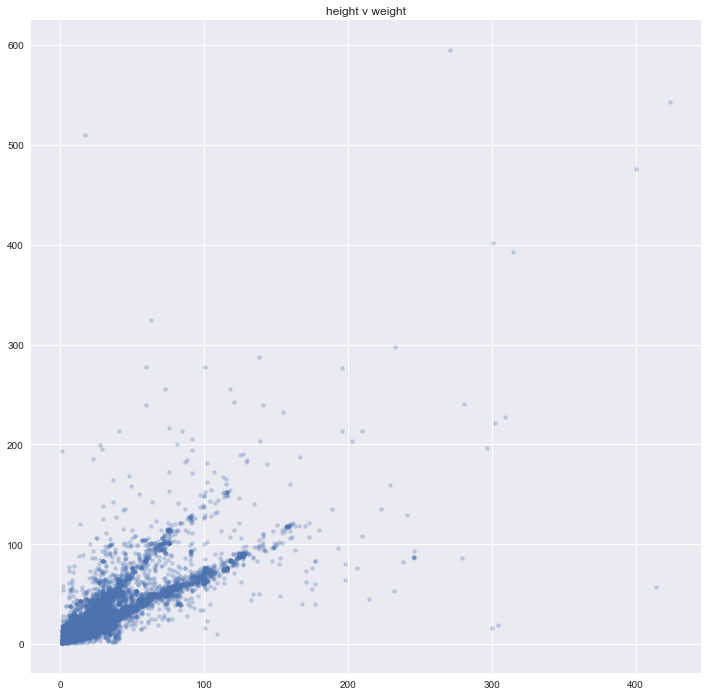

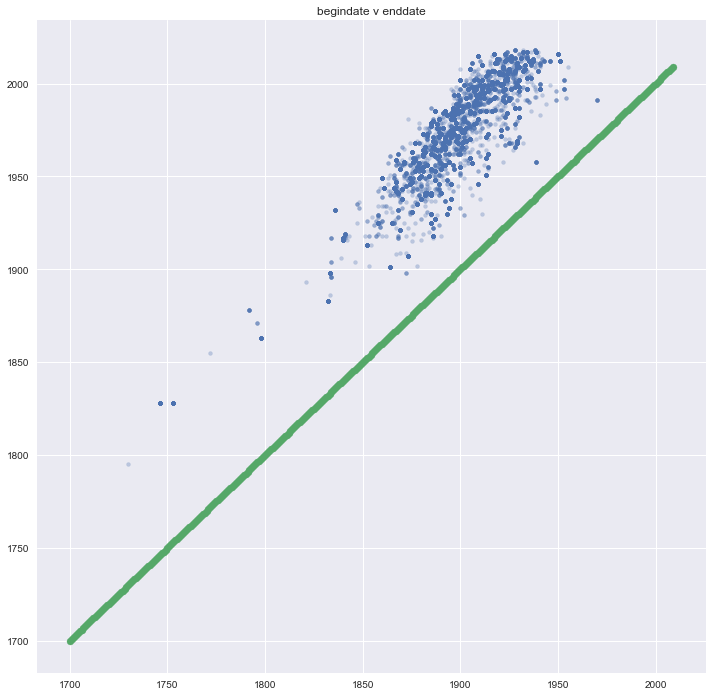

In [36]:
num_of_samples = 20000
plt.figure(figsize=((12,12)))
plt.scatter(x=temp_data['Height (cm)'][0:num_of_samples], y=temp_data['Width (cm)'][0:num_of_samples], alpha=0.3, s=15)
plt.title('height v width')
plt.show()

plt.figure(figsize=((12,12)))
plt.scatter(x=temp_data['BeginDate'][0:num_of_samples], y=temp_data['EndDate'][0:num_of_samples], alpha=0.3, s=15)
plt.scatter(x=np.arange(1700,2010), y=np.arange(1700,2010))
plt.title('begindate v enddate')
plt.show()
# green line is to show paintings that were started and finished in same year

In [9]:
temp_data.shape

(67639, 4)

In [10]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(temp_data)
print(np.sum(pca.explained_variance_ratio_), '% variance captured')
print(data_pca.shape)

0.883786855767 % variance captured
(67639, 2)


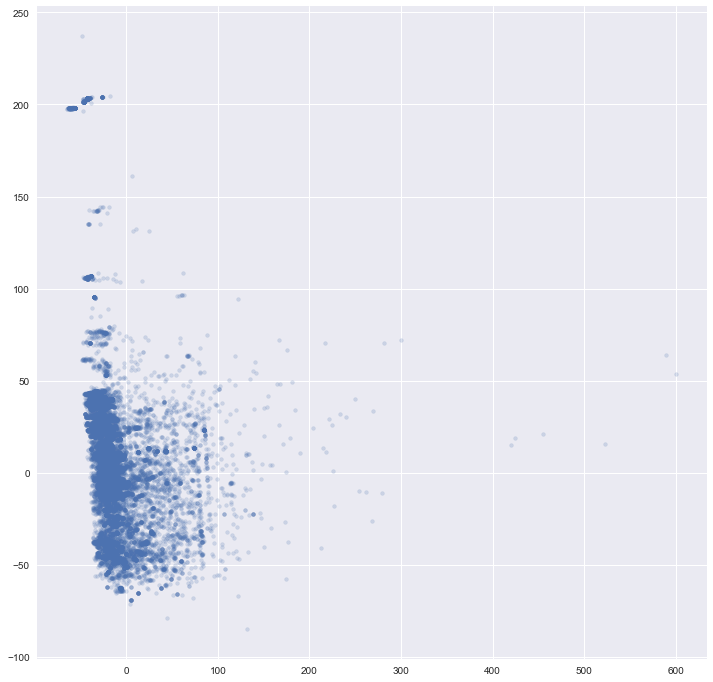

In [22]:
plt.figure(figsize=((12,12)))
plt.scatter(x=data_pca[0:num_of_samples,0], y=data_pca[0:num_of_samples,1], alpha=0.2, s=15)
plt.show()